## EDA(Exploratory Data Analysis)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

First 5 Rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  G

C:\Users\archi\AppData\Local\Temp\ipykernel_34212\1752694485.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=df, palette="coolwarm")


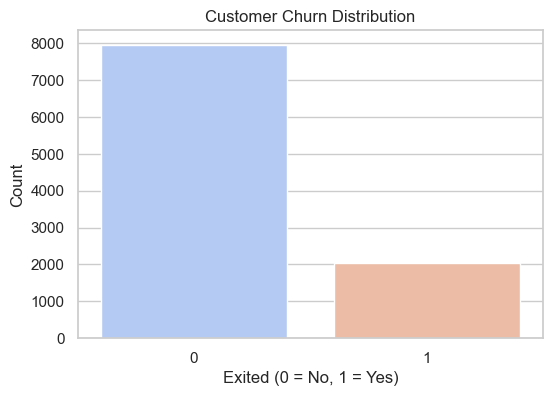


Statistical Summary:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min

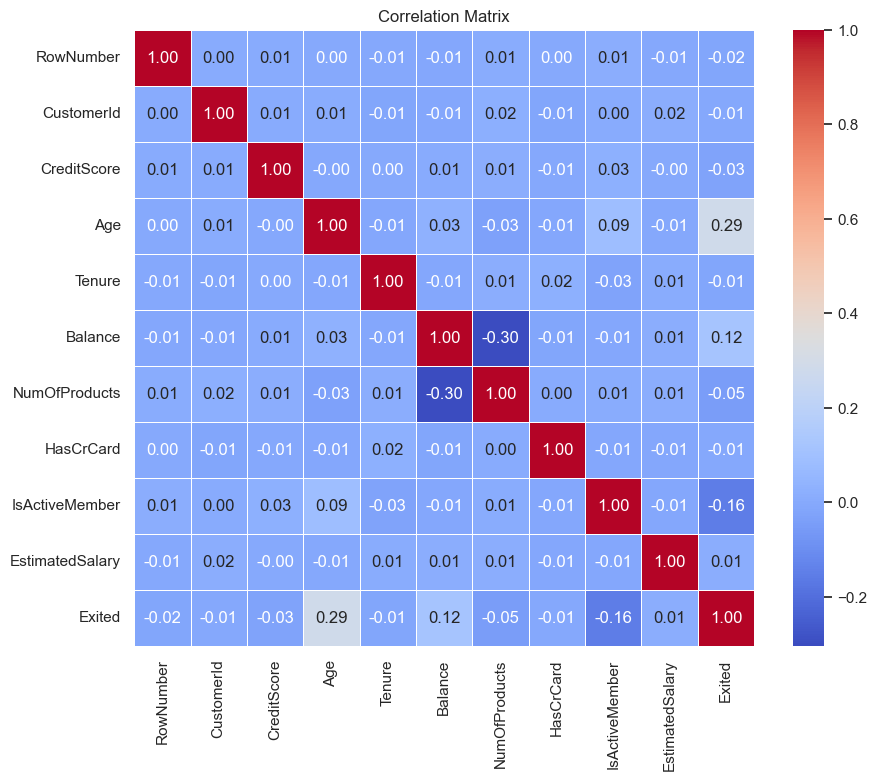

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# View the structure and sample data
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Class Distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="Exited", data=df, palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## PREPROCESSING

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop non-informative columns
df_processed = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical variables
le_gender = LabelEncoder()
le_geo = LabelEncoder()

df_processed['Gender'] = le_gender.fit_transform(df_processed['Gender'])  # Typically Male = 1, Female = 0
df_processed['Geography'] = le_geo.fit_transform(df_processed['Geography'])  # France, Spain, Germany -> 0, 1, 2

# Define target and features
X = df_processed.drop(columns='Exited')
y = df_processed['Exited']

# Scale numerical features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(
    X_scaled[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
)

# View processed features
print("Preprocessed Feature Sample:")
print(X_scaled.head())


Preprocessed Feature Sample:
   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.326221          0       0  0.293517 -1.041760 -1.225848   
1    -0.440036          2       0  0.198164 -1.387538  0.117350   
2    -1.536794          0       0  0.293517  1.032908  1.333053   
3     0.501521          0       0  0.007457 -1.387538 -1.225848   
4     2.063884          2       0  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0              1          1               1         0.021886  
1              1          0               1         0.216534  
2              3          1               0         0.240687  
3              2          0               0        -0.108918  
4              1          1               1        -0.365276  


Confusion Matrix:
[[1123  470]
 [ 115  292]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.72      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.73      2000

ROC AUC Score: 0.77


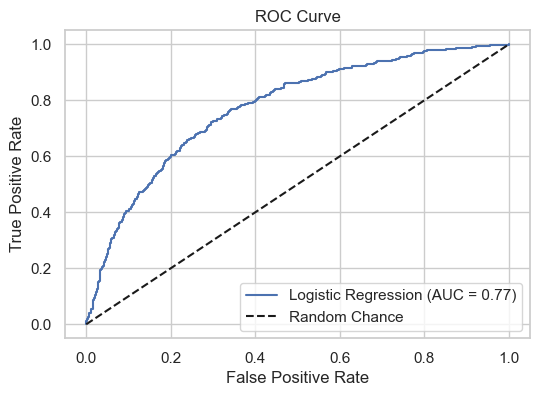

In [27]:
# Step 3: Modeling with Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## Modeling (Random Forest /  Xgboost)

Original class distribution: {0: 6370, 1: 1630}
After SMOTE: {1: 6370, 0: 6370}
Random Forest After SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1593
           1       0.59      0.58      0.59       407

    accuracy                           0.83      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.83      0.83      0.83      2000

ROC AUC: 0.8450862264421586


C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:12:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost After SMOTE:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.62      0.58      0.60       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

ROC AUC: 0.8382635331787873


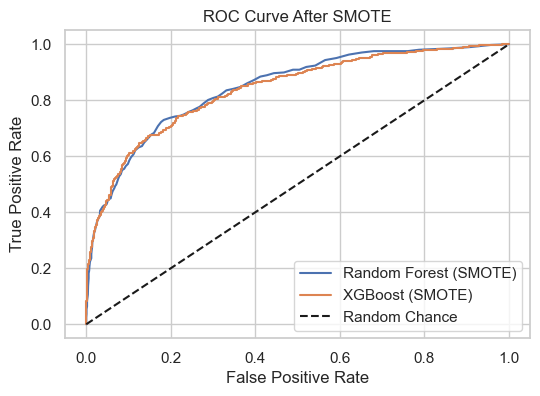

In [28]:
# Step 4.1: Apply SMOTE and Re-train Models

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Original class distribution:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_smote).value_counts().to_dict())

# --- Re-train Random Forest ---
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

rf_pred = rf_smote.predict(X_test)
rf_proba = rf_smote.predict_proba(X_test)[:, 1]

print("Random Forest After SMOTE:")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))

# --- Re-train XGBoost ---
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

xgb_pred = xgb_smote.predict(X_test)
xgb_proba = xgb_smote.predict_proba(X_test)[:, 1]

print("\nXGBoost After SMOTE:")
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))

# --- ROC Curve Comparison ---
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (SMOTE)')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (SMOTE)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve After SMOTE')
plt.legend()
plt.grid(True)
plt.show()




## Feature Importance

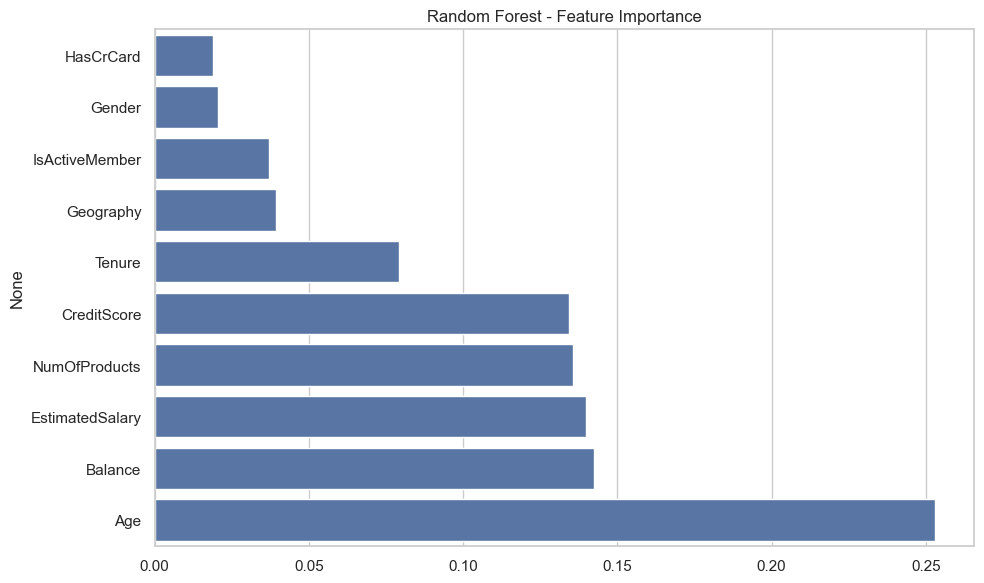

In [29]:
# For Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
features = X_train.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices])
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()


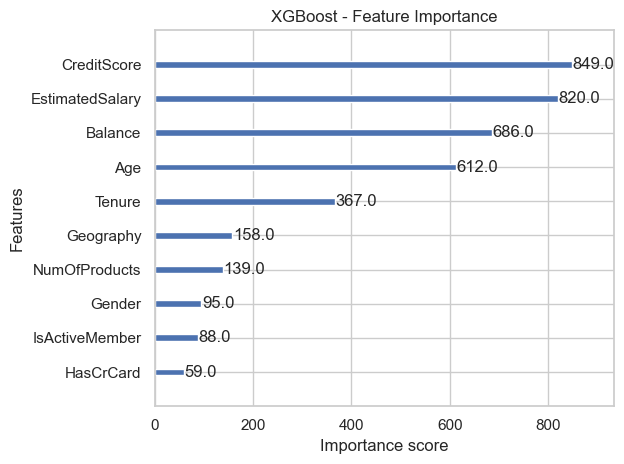

In [30]:
# For XGBoost
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10)
plt.title('XGBoost - Feature Importance')
plt.tight_layout()
plt.show()


In [31]:
import pickle

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Save scaler to scaler.pkl (NOT the same name!)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)




In [32]:
# Check model file
with open("xgb_model.pkl", "rb") as f:
    model = pickle.load(f)
print(type(model))  # Should show <class 'xgboost.sklearn.XGBClassifier'>

# Check scaler file
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)
print(type(scaler))  # Should show <class 'sklearn.preprocessing._data.StandardScaler'>


<class 'xgboost.sklearn.XGBClassifier'>
<class 'sklearn.preprocessing._data.StandardScaler'>


In [34]:
# Select two examples: one who stayed and one who churned
example_stay_real = df_processed[df_processed['Exited'] == 0].iloc[0]
example_churn_real = df_processed[df_processed['Exited'] == 1].iloc[0]

# Extract feature columns (without target)
real_samples = pd.DataFrame([example_stay_real, example_churn_real]).drop(columns='Exited')

# Save the original values for display (before scaling)
original_values = real_samples.copy()

# Scale the necessary numeric columns
real_samples_scaled = real_samples.copy()
real_samples_scaled[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.transform(
    real_samples_scaled[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
)

# Predict with both models
rf_real_preds = rf_smote.predict(real_samples_scaled)
xgb_real_preds = xgb_smote.predict(real_samples_scaled)

# Pretty print
status_map = {0: "Likely to Stay", 1: "Likely to Churn"}

print("🎯 Real Customer Predictions from Dataset\n")

for i, label in enumerate(["Customer who stayed", "Customer who churned"]):
    print(f"👤 {label}:")
    print(original_values.iloc[i])
    print(f"   🔍 Random Forest Prediction: {status_map[rf_real_preds[i]]}")
    print(f"   🔍 XGBoost Prediction      : {status_map[xgb_real_preds[i]]}")
    print("-" * 60)


🎯 Real Customer Predictions from Dataset

👤 Customer who stayed:
CreditScore           608.00
Geography               2.00
Gender                  0.00
Age                    41.00
Tenure                  1.00
Balance             83807.86
NumOfProducts           1.00
HasCrCard               0.00
IsActiveMember          1.00
EstimatedSalary    112542.58
Name: 1, dtype: float64
   🔍 Random Forest Prediction: Likely to Stay
   🔍 XGBoost Prediction      : Likely to Stay
------------------------------------------------------------
👤 Customer who churned:
CreditScore           619.00
Geography               0.00
Gender                  0.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Name: 0, dtype: float64
   🔍 Random Forest Prediction: Likely to Churn
   🔍 XGBoost Prediction      : Likely to Churn
------------------------------------